Create the data

In [1]:
import numpy as np
X = np.linspace(0, 1, 20).reshape(-1, 1) # matrix shape

def formula(x):
    return (1 + 0.6 * np.sin (2 * np.pi * x / 0.7)) + 0.3 * np.sin (2 * np.pi * x) / 2

Y = [formula(x) for x in X]

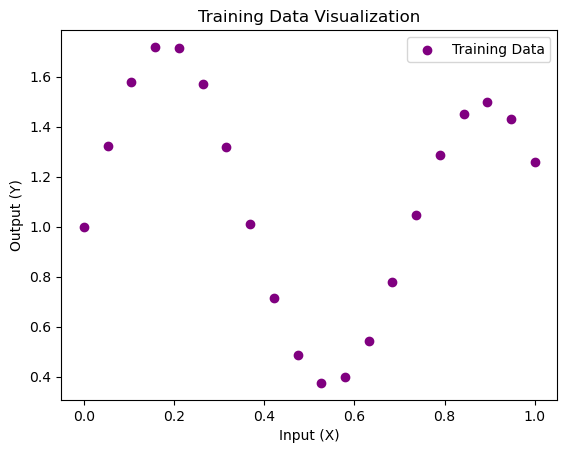

In [7]:
import matplotlib.pyplot as plt

# Visualize the training data
plt.scatter(X, Y, color='purple', label='Training Data')
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.title('Training Data Visualization')
plt.legend()
plt.show()

### Structure of the RBFN

In [11]:
# RBF Layer parameters (centers and radii)
c1, r1 = 0.2, 0.2  # Center and radius for RBF 1
c2, r2 = 0.9, 0.1  # Center and radius for RBF 2

# Gaussian RBF function
def rbf(x, c, r):
    return np.exp(-(x - c)**2 / (2 * r**2))

# Initialize output layer weights and bias
w1, w2 = np.random.randn(), np.random.randn()  # Weights for two RBFs
b = np.random.randn()                          # Bias

# Training parameters
learning_rate = 0.01
epochs = 1000

### Training

In [12]:
loss_history = []

for epoch in range(epochs):
    total_loss = 0
    
    for i in range(len(X)):
        x_i = X[i][0]             
        y_i = Y[i][0]              

        # Forward pass: calculate RBF activations for each example
        phi_1 = rbf(x_i, c1, r1)   # Activation of first RBF
        phi_2 = rbf(x_i, c2, r2)   # Activation of second RBF
        phi = np.array([phi_1, phi_2]).reshape(1, -1)  # Combine activations into a vector

        # Calculate the output
        output = w1 * phi_1 + w2 * phi_2 + b

        # Calculate the error
        error = y_i - output

        # Calculate loss (squared error) for this example
        loss = 0.5 * (error ** 2)
        total_loss += loss  # Accumulate loss for monitoring

        # Calculate gradients
        w1_grad = phi_1 * error  
        w2_grad = phi_2 * error  
        b_grad = error           

        # Update weights and bias
        w1 += learning_rate * w1_grad
        w2 += learning_rate * w2_grad
        b += learning_rate * b_grad

    # Record total loss for the epoch
    loss_history.append(total_loss)

In [14]:
# Final weights and bias after training
print("\nFinal weights and bias:")
print(f"w1: {w1}")
print(f"w2: {w2}")
print(f"b: {b}")


Final weights and bias:
w1: 1.2511013223477303
w2: 1.36775596973854
b: 0.3116054358196687


### Plot loss history

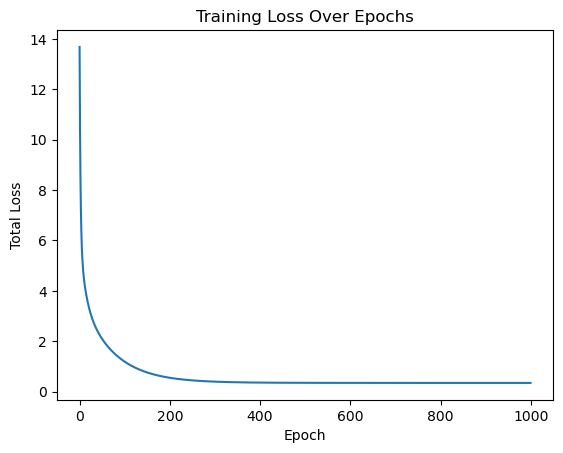

In [13]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Training Loss Over Epochs')
plt.show()

We can see the loss decreases as the weights are updated over the training

### Testing

Now we're going to generate new data and use it to make predictions and test the model's accuracy

In [15]:
TEST_SIZE = 50

# Generate random test data
X_test_ = np.random.rand(TEST_SIZE, 1)  # Random points in the range [0, 1]
X_test = [x for x in X_test_ if not np.any(np.isclose(X, x))]  # Keep only unique points not in X
X_test = np.array(X_test).reshape(-1, 1)

# Calculate the true values for the test data
Y_test = np.array([formula(x) for x in X_test]).reshape(-1, 1)

In [16]:
# Define the function to apply the RBF model
def apply_model_rbf(x, w1, w2, b, c1, r1, c2, r2):
    # Compute RBF activations for the input x
    phi_1 = rbf(x, c1, r1)  # Activation of first RBF
    phi_2 = rbf(x, c2, r2)  # Activation of second RBF

    # Calculate the output using weights and bias
    output = w1 * phi_1 + w2 * phi_2 + b
    return output

# Apply model to each test sample in X_test
predictions = apply_model_rbf(X_test, w1, w2, b, c1, r1, c2, r2) 


The following chart shows the predicted values vs real values

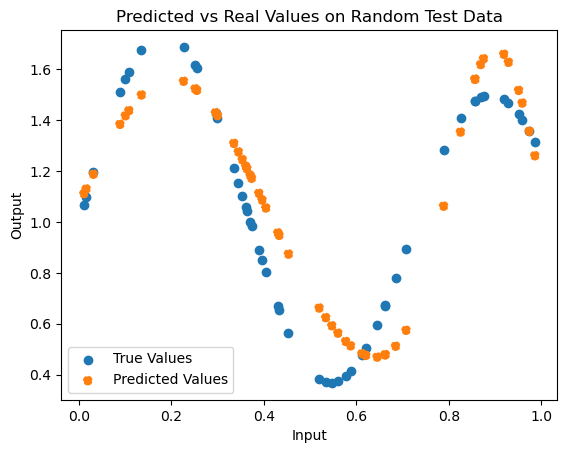

In [18]:
# Sort test data and predictions for cleaner plot
sorted_indices = np.argsort(X_test, axis=0).flatten()
X_test_sorted = X_test[sorted_indices]
Y_test_sorted = Y_test[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Plot predicted values vs real values
plt.scatter(X_test_sorted, Y_test_sorted, label='True Values')
plt.scatter(X_test_sorted, predictions_sorted, label='Predicted Values', linestyle='dashed')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Predicted vs Real Values on Random Test Data')
plt.legend()
plt.show()

In [19]:
# Calculate Mean Squared Error for the test set
mse = np.mean((Y_test - predictions) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

Mean Squared Error on Test Set: 0.0285
